In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 패션MNIST 데이터
데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
(train_input, train_target), (test_input, test_target) = load_data()

In [7]:
train_scaled = train_input / 255.0 # 0~1 실수값 변경

In [8]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
train_input.shape

(60000, 28, 28)

In [10]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [17]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [19]:
# 함수 사용 예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 3s - loss: 0.5150 - accuracy: 0.8140 - 3s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3863 - accuracy: 0.8596 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3588 - accuracy: 0.8722 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3413 - accuracy: 0.8786 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3324 - accuracy: 0.8815 - 2s/epoch - 1ms/step


In [21]:
history.history

{'loss': [0.514981746673584,
  0.3862587511539459,
  0.3588186502456665,
  0.34132832288742065,
  0.33240410685539246],
 'accuracy': [0.8139791488647461,
  0.8596458435058594,
  0.8722083568572998,
  0.8786249756813049,
  0.8815416693687439]}

#### 손실곡선 차트

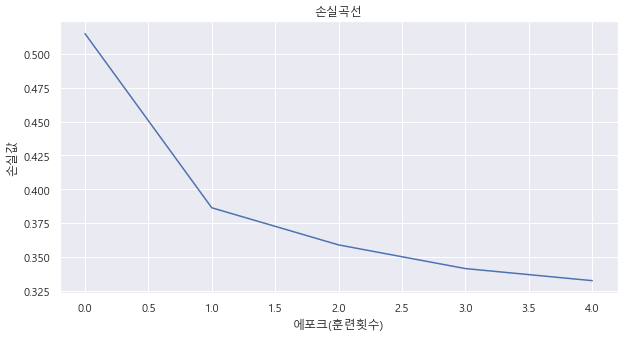

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

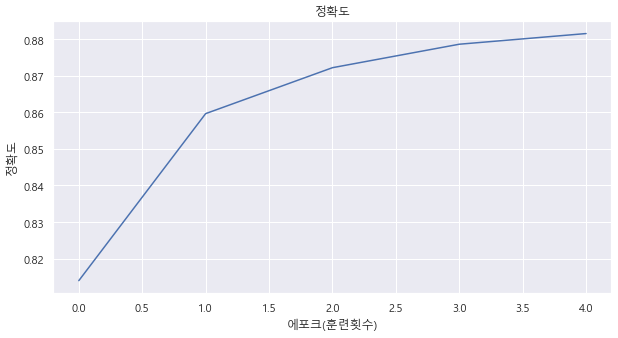

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번 훈련

In [24]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5311 - accuracy: 0.8124
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3903 - accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3558 - accuracy: 0.8718
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8819
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3186 - accuracy: 0.8872
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3084 - accuracy: 0.8895
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2959 - accuracy: 0.8970
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.8976
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2822 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.274

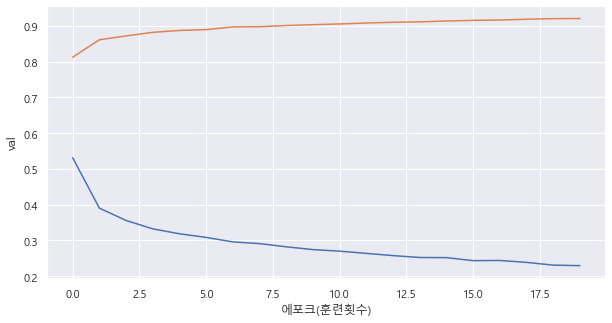

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [26]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5301 - accuracy: 0.8119 - val_loss: 0.4516 - val_accuracy: 0.8393
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8600 - val_loss: 0.3833 - val_accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8731 - val_loss: 0.3493 - val_accuracy: 0.8764
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.8814 - val_loss: 0.3954 - val_accuracy: 0.8615
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.8876 - val_loss: 0.3660 - val_accuracy: 0.8763
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3062 - accuracy: 0.8922 - val_loss: 0.3504 - val_accuracy: 0.8789
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8955 - val_loss: 0.4254 - val_accuracy:

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

훈련세트/검증세트 비교

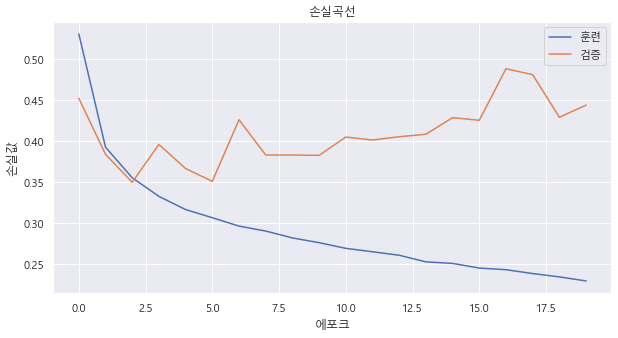

In [28]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5907 - accuracy: 0.7915 - val_loss: 0.4417 - val_accuracy: 0.8418
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4510 - accuracy: 0.8411 - val_loss: 0.4091 - val_accuracy: 0.8545
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4243 - accuracy: 0.8517 - val_loss: 0.4029 - val_accuracy: 0.8612
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.8563 - val_loss: 0.3912 - val_accuracy: 0.8679
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4058 - accuracy: 0.8624 - val_loss: 0.3810 - val_accuracy: 0.8681
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8654 - val_loss: 0.3921 - val_accuracy: 0.8704
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8674 - val_loss: 0.3808 - val_accuracy:

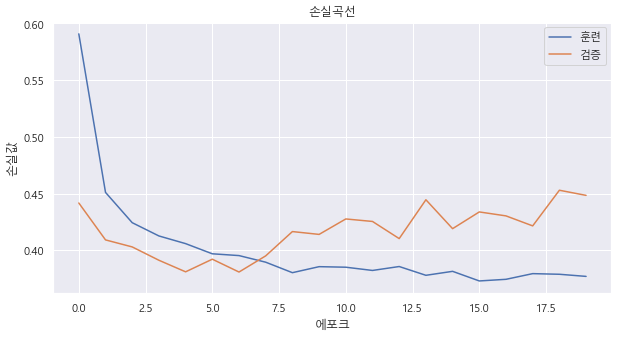

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8718 - val_loss: 0.4055 - val_accuracy: 0.8676
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8748 - val_loss: 0.3916 - val_accuracy: 0.8693
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8788 - val_loss: 0.3972 - val_accuracy: 0.8745
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8794 - val_loss: 0.3731 - val_accuracy: 0.8774
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8849 - val_loss: 0.3874 - val_accuracy: 0.8786
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3189 - accuracy: 0.8839 - val_loss: 0.3725 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8864 - val_loss: 0.3672 - val_accuracy:

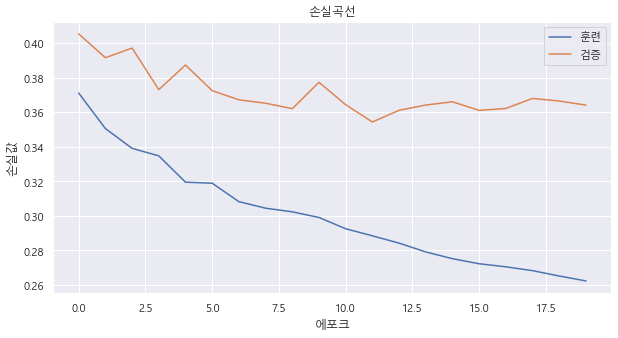

In [33]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [34]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [35]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

##### 가중치 모델 로드

In [39]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [40]:
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체 모델 로드

In [41]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8820


[0.36415019631385803, 0.8820000290870667]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장하면 모든 기능을 다 수행 

In [42]:
model.predict(val_scaled)

375/375 [==============================] - 0s 924us/step


array([[9.4184038e-20, 0.0000000e+00, 1.8422261e-20, ..., 3.4699991e-18,
        1.0000000e+00, 4.2608202e-25],
       [1.9824527e-13, 3.2585856e-38, 2.0892678e-13, ..., 3.3835861e-24,
        1.0000000e+00, 4.4600283e-23],
       [1.8664658e-20, 3.2241333e-24, 3.0208326e-38, ..., 9.9999917e-01,
        1.3874612e-15, 3.7253888e-19],
       ...,
       [4.7008171e-09, 4.8656222e-31, 1.5187717e-11, ..., 7.4691101e-16,
        9.9999988e-01, 1.6500873e-14],
       [5.7279705e-15, 0.0000000e+00, 7.4265758e-17, ..., 6.5593894e-30,
        1.0000000e+00, 2.3198738e-26],
       [5.4987669e-01, 2.5123879e-11, 5.5358536e-04, ..., 5.9038054e-09,
        1.5404512e-03, 1.3241105e-06]], dtype=float32)

In [43]:
### 예측 결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.882

In [45]:
val_labels

array([8, 8, 7, ..., 8, 8, 0], dtype=int64)

In [47]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5839 - accuracy: 0.7940 - val_loss: 0.4335 - val_accuracy: 0.8430
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8413 - val_loss: 0.3966 - val_accuracy: 0.8554
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4003 - accuracy: 0.8531 - val_loss: 0.3609 - val_accuracy: 0.8672
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3817 - accuracy: 0.8612 - val_loss: 0.3515 - val_accuracy: 0.8737
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3644 - accuracy: 0.8656 - val_loss: 0.3491 - val_accuracy: 0.8717
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3496 - accuracy: 0.8717 - val_loss: 0.3433 - val_accuracy: 0.8704
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3436 - accuracy: 0.8726 - val_loss: 0.3511 - val_accuracy:

In [48]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3168 - accuracy: 0.8896


[0.316802054643631, 0.8895833492279053]

#### 조기종료

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장돔
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1485/1500 [============================>.] - ETA: 0s - loss: 0.5975 - accuracy: 0.7886
Epoch 1: val_loss improved from inf to 0.44353, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5961 - accuracy: 0.7892 - val_loss: 0.4435 - val_accuracy: 0.8383
Epoch 2/20
1484/1500 [============================>.] - ETA: 0s - loss: 0.4433 - accuracy: 0.8411
Epoch 2: val_loss improved from 0.44353 to 0.39493, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.8409 - val_loss: 0.3949 - val_accuracy: 0.8541
Epoch 3/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.4071 - accuracy: 0.8541
Epoch 3: val_loss improved from 0.39493 to 0.36701, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4067 - accuracy: 0.8542 - val_loss: 0.3670 - val_accuracy: 0.8650
Epoch 4/20
1488/1500 [===================

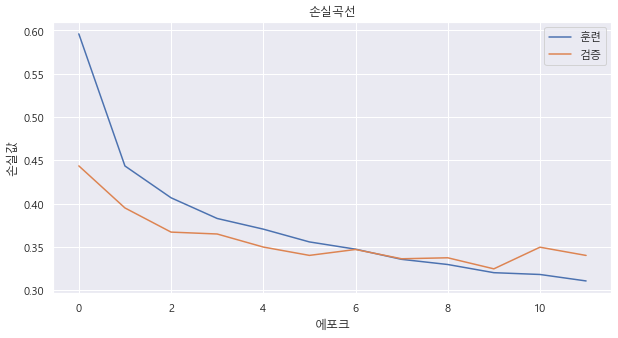

In [65]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [64]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch

11

In [66]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8788


[0.3373679220676422, 0.8787500262260437]

In [67]:
# 최종값 저장
model.save('./data/best_model_epoch15.h5')

In [68]:
model = keras.models.load_model('./data/best_model.h5')   # earlystopping 콜백된 모델
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8788


[0.3373679220676422, 0.8787500262260437]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [69]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8830


[0.3245610296726227, 0.8830000162124634]

In [72]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 1ms/step


0.87875

In [73]:
# 예측결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)